<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 보스턴 데이터로 다항회귀  </h2>
</div>

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## X, y 설정 

In [3]:
X = pd.DataFrame(boston_df['RM']) 
y = boston_df['PRICE']

## 학습평가 나누기 

In [4]:
# 학습용 및 검증용 데이터로 분리한다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.3,
                                                       random_state = 42)

## 단순선형회귀 

In [5]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train) #  학습!!
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score    # 사이킷런에 있는 평가 지표 함수들

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('R2 score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 40.351 , RMSE : 6.352
R2 score : 0.458


## 2차 다항회귀 

In [7]:
# 2차 다항회귀 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


poly_model = LinearRegression().fit(X_train_poly,y_train)
poly_pred = poly_model.predict(X_test_poly)


mse = mean_squared_error(y_test, poly_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('R2 score : {0:.3f}'.format(r2_score(y_test, poly_pred)))


MSE : 32.152 , RMSE : 5.670
R2 score : 0.569


## 6차 다항회귀 를 사용하고, 그래프에 나타내시오. 

In [8]:
degree_poly_6 = PolynomialFeatures(degree=6) # 다항회귀 설정 
# X_train 변경 
X_train_6 = degree_poly_6.fit_transform(X_train)
# X_test 변경 
X_test_6 = degree_poly_6.fit_transform(X_test)

# 바뀐 X_train, X_test를 가지고 모델 학습 
model_6 = LinearRegression().fit(X_train_6,y_train)
y_pred_6 = model_6.predict(X_test_6)

In [9]:
mse = mean_squared_error(y_test, y_pred_6)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('R2 score : {0:.3f}'.format(r2_score(y_test, y_pred_6)))


MSE : 32.787 , RMSE : 5.726
R2 score : 0.560


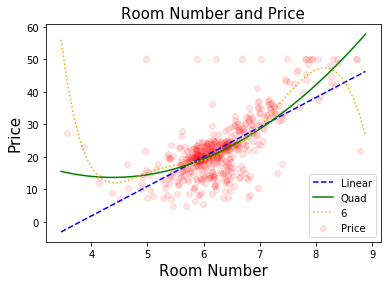

In [11]:
import matplotlib.pyplot as plt

xx = np.linspace(X['RM'].min()-0.1,X['RM'].max()+0.1)[:,np.newaxis]
xx2 = poly.fit_transform(xx)
xx3 = degree_poly_6.fit_transform(xx) # 추가 부분

yy1 = model.predict(xx)
yy2 = poly_model.predict(xx2)
yy3 = model_6.predict(xx3) # 추가 부분

plt.scatter(X,y,color='red',alpha=0.1,label = 'Price')
plt.plot(xx,yy1,color='blue',linestyle='--',label='Linear') # 1차식을 그릴거니까
plt.plot(xx,yy2,color='green',linestyle='-',label='Quad') # 2차식을 그릴거
plt.plot(xx,yy3,color='orange', linestyle=':',label='6')# 6차식 추가 

plt.title("Room Number and Price",fontsize=15)
plt.xlabel('Room Number',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend(fontsize=10)
plt.show()